Lagrange's work on Kepler equation suggests that an equation of the form 
\begin{equation}
y=x+\alpha \phi(y)
\end{equation}
Its solution is approximated by the series expansion:
\begin{equation}
y=x+\sum_{n=1}^{\infty} \frac{\alpha^{n}}{n !} \frac{d^{n-1}}{d x^{n-1}} \phi(x)^{n}
\end{equation}

In [1]:
import numpy as np  # calculations
import pathlib  # needed to create folder
import matplotlib.pyplot as plt  # needed for graphs
import sympy as sp
from sympy.abc import E, e, n, M, o

Kepler's equation is 
\begin{equation}
E=M+e \sin E
\end{equation}
Its solution is approximated by the series expansion:
\begin{equation}
y=M+\sum_{n=1}^{\infty} \frac{e^{n}}{n !} \frac{d^{n-1}}{d E^{n-1}} \sin(M)^{n}
\end{equation}
We plan to evaluate the series expression E(M) up to order n=3 and n=10 for eccentrities e=0.3 and e=0.9.

We're using python's package Sympy to do our symbolic interpretation.
From sympy.abc we're importing these symbols. Their usage is:
E = Eccentric anomaly of Kepler's Equation
M = Mean Anomaly of Kepler's Equation
e = Eccentricity
n = index of summation
o = upper bound of summation

Some starting setup

In [2]:
dpisiz=100
def savim(dir,name):
    path = pathlib.Path(f"./{dir}")
    path.mkdir(exist_ok=True,parents=True)
    plt.savefig(f'./{dir}/{name}.png',dpi=dpisiz)

In [3]:
fract = e ** n / sp.factorial(n)
func = (sp.sin(M)) ** n
dif_func = (sp.Derivative(func, (M, n - 1)))
sumo = sp.Sum(fract * dif_func, (n, 1, o))
sum3 = (sumo.subs(o, 3)).doit() #The form asked for n=3. Could add .simplify() as well
sum10 = (sumo.subs(o, 10)).doit() #The form asked for n=3. Could add .simplify() as well
E3 = sum3 + M
E10 = sum10 + M
En3_e3 = sp.trigsimp(E3.subs(e, 0.3))
En10_e3 = sp.trigsimp(E10.subs(e, 0.3))
En3_e9 = sp.trigsimp(E3.subs(e, 0.9))
En10_e9 = sp.trigsimp(E10.subs(e, 0.9))

Use sp.lambdify to create our lambda functions and plot our graphs.
Could have used sp.plot but I prefer having more options with matplotlib.

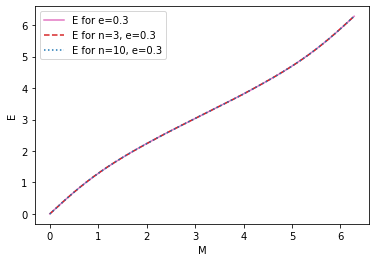

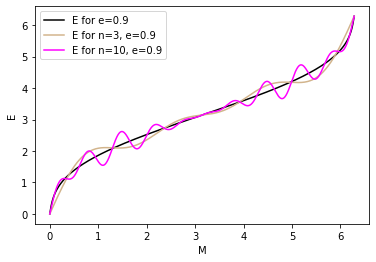

In [4]:

numberoftries = 10000
xx = np.linspace(0, 2 * np.pi, 10000)
En3_e3f = sp.lambdify(M, En3_e3)(xx)
En10_e3f = sp.lambdify(M, En10_e3)(xx)
En3_e9f = sp.lambdify(M, En3_e9)(xx)
En10_e9f = sp.lambdify(M, En10_e9)(xx)

fig = plt.figure()
ax = plt.axes()


data = np.genfromtxt(fname="data.csv", delimiter=',') #Importing data from task 1
ax.set_ylabel('E')
ax.set_xlabel('M')
ax.plot(data[:, 0], data[:, 2], label='E for e=0.3', color='tab:pink')
ax.plot(xx, En3_e3f, label='E for n=3, e=0.3', linestyle='dashed', color='tab:red')
ax.plot(xx, En10_e3f, label='E for n=10, e=0.3', linestyle='dotted', color='tab:blue')
ax.legend()
savim('pr1_task2','e_03')
fig1 = plt.figure()
ax1 = plt.axes()
ax1.plot(data[:, 0], data[:, 5], label='E for e=0.9', color='black' )
ax1.plot(xx, En3_e9f, label='E for n=3, e=0.9', color='tan')
ax1.plot(xx, En10_e9f, label='E for n=10, e=0.9', color='fuchsia')
ax1.legend()
ax1.set_ylabel('E')
ax1.set_xlabel('M')
savim('pr1_task2','e_09')

As we can see from our results, for lower eccentricities both n=3 and n=10 are nearly identical compared to the Newton-Raphson method.
However, for 0.9, this is no longer the case. In this case there are some sinusoidal curves appearing except the middle of the curve (There are still some curvature showing at the middle, however it's close to the Newton-Raphson method).

Regarding the form \begin{equation}
E=M+\sum_{n} \Pi_{n}(e) \sin (n M)
\end{equation}
Lagrange's theorem states that for any f
\begin{equation}
\begin{aligned}
f(y)=f(z) &+\frac{x}{1 !} F(z) f^{\prime}(z) \\
&+\frac{x^{2}}{2 !} \frac{d}{d z}\left[\{F(z)\}^{2} f^{\prime}(z)\right] \\
&+\frac{x^{3}}{3 !} \frac{d^{2}}{d z^{2}}\left[\{F(z)\}^{3} f^{\prime}(z)\right] \\
&+\cdots \\
&+\frac{x^{n}}{n !} \frac{d^{n-1}}{d z^{n-1}}\left[\{F(z)\}^{n} f^{\prime}(z)\right] \\
&+\cdots
\end{aligned}
\end{equation}
Applying the above theorem to Kepler's equation
\begin{equation}
E=M+e \sin E
\end{equation}
it yields
\begin{equation}
\begin{aligned}
E=M+e \sin M &+\frac{e^{2}}{2 !} \frac{d}{d M}\left[\sin ^{2} M\right]+\frac{e^{3}}{3 !} \frac{d^{2}}{d M^{2}}\left[\sin ^{3} M\right]+\frac{e^{4}}{4 !} \frac{d^{3}}{d M^{3}}\left[\sin ^{4} M\right]+\cdots \\
&+\frac{e^{n}}{n !} \frac{d^{n-1}}{d M^{n-1}}\left[\sin ^{n} M\right]+\cdots
\end{aligned}
\end{equation}
Neglecting higher orders of derivatives
\begin{equation}
\begin{aligned}
\frac{d}{d M} \sin ^{2} M &=2 \cos M \sin M=\sin 2 M \\
\frac{d^{2}}{d M^{2}} \sin ^{3} M &=6 \cos ^{2} M \sin M-3 \sin ^{3} M=\frac{1}{4}(9 \sin 3 M-3 \sin M) \\
&=\frac{1}{2^{2}}\left(3^{3} \sin 3 M-3 \sin M\right) \\
\frac{d^{3}}{d M^{3}} \sin ^{4} M &=24 \cos ^{3} M \sin M-40 \cos M \sin ^{3} M=8 \sin 4 M-4 \sin 2 M \\
&=\frac{1}{2^{3}}\left(4^{3} \sin 4 M-2^{3} \cdot 4 \sin 2 M\right) \\
\frac{d^{4}}{d M^{4}} \sin ^{5} M &=120 \cos ^{4} M \sin M-440 \cos ^{2} M \sin ^{3} M+65 \operatorname{coin}^{5} M \\
&=\frac{1}{16}(625 \sin 5 M-405 \sin 3 M+10 \sin M) \\
&=\frac{1}{2^{4}}\left(5^{4} \sin 5 M-3^{4} \cdot 5 \sin 3 M+10 \sin M\right) \\
\frac{d^{5}}{d M^{5}} \sin ^{6} M &=720 \cos ^{5} M \sin M-4800 \cos ^{3} M \sin ^{3} M+2256 \cos M \sin ^{5} M \\
&=243 \sin 6 M-192 \sin 4 M+15 \sin 2 M \\
&=\frac{1}{2^{5}}\left(6^{5} \sin 6 M-4^{5} \cdot 6 \sin 4 M+2^{5} \cdot 15 \cos 2 M\right)
\end{aligned}
\end{equation}
Inserting the above derivatives to our series expression we get
\begin{equation}
\begin{aligned}
E=M &+e \sin M+\frac{e^{2}}{2 !} \sin 2 M+\frac{e^{3}}{3 ! 2^{2}}\left(3^{2} \sin 3 M-3 \sin M\right)+\frac{e^{4}}{4 ! 2^{3}}\left(4^{3} \sin 4 M-2^{3} \cdot 4 \sin 2 M\right) \\
&+\frac{e^{5}}{5 ! 2^{4}}\left(5^{4} \sin 5 M-3^{4} \cdot 5 \sin 3 M+10 \sin M\right)+\frac{e^{6}}{6 ! 2^{5}}\left(6^{5} \sin 6 M-4^{5} \cdot 6 \sin 4 M+2^{5} \cdot 15 \sin 2 M\right)+\cdots
\end{aligned}
\end{equation}
which simplifies to
\begin{equation}
\begin{aligned}
E=M &+\left(e-\frac{1}{8} e^{3}+\frac{1}{192} e^{5}+\cdots\right) \sin M+\left(\frac{1}{2} e^{2}-\frac{1}{6} e^{4}+\frac{1}{48} e^{6}+\cdots\right) \sin 2 M \\
&+\left(\frac{3}{8} e^{3}-\frac{27}{128} e^{5}+\cdots\right) \sin 3 M+\left(\frac{1}{3} e^{4}-\frac{4}{15} e^{6}+\cdots\right) \sin 4 M \\
&+\left(\frac{125}{384} e^{5}+\cdots\right) \sin 5 M+\left(\frac{27}{80} e^{6}+\cdots\right) \sin 6 M+\cdots
\end{aligned}
\end{equation}